In [12]:
#mnist
from __future__ import print_function
import h5py  # [1] import 문 추가
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


# 반복 횟수와 생성할 cluster의 개수 지정 (1)
batch_size = 128
num_classes = 10
epochs = 20

# 입력 데이터 차원 수
img_rows, img_cols = 28, 28

# 훈련 및 테스트 데이터를 섞어서 나눈다. (2)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    # 읽어온 이미지의 크기를 균일하게 조정 (3)
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 벡터를 이진 분류 매트릭스로 변환한다.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 학습에 활용할 모델을 생성한다 (4)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 학습 절차 구성 (5)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 학습 수행
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# 학습한 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


c:\Users\alex0\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.1234 - loss: 2.2913 - val_accuracy: 0.2916 - val_loss: 2.2346
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.2338 - loss: 2.2284 - val_accuracy: 0.4558 - val_loss: 2.1516
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.3489 - loss: 2.1500 - val_accuracy: 0.5556 - val_loss: 2.0424
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.4351 - loss: 2.0406 - val_accuracy: 0.6355 - val_loss: 1.8975
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.4986 - loss: 1.9077 - val_accuracy: 0.6989 - val_loss: 1.7176
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.5548 - loss: 1.7362 - val_accuracy: 0.7457 - val_loss: 1.5144
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.5907 - loss: 1.5703 - val_accuracy: 0.7736 - val_loss: 1.3126
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6243 - loss: 1.4073 - 

In [10]:
#food
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
import numpy as np

## 분류 데이터 로딩

root_dir = "./source/train/"
# 카테고리 명령 지정 (1)
categories = ["Chicken", "Dolsotbab", "Jeyugbokkeum", "Kimchi", 
                "Samgyeobsal", "SoybeanPasteStew"]
nb_classes = len(categories)

# 이미지 크기 지정 (2)
image_width = 64
image_height = 64


## 데이터 변수
X = [] # 이미지 데이터
Y = [] # 레이블 데이터

for idx, category in enumerate(categories):
    image_dir = root_dir + category
    files = glob.glob(image_dir + "/" + "*.jpg")
    print(image_dir + "/" +"*.jpg")

    for i, f in enumerate(files):
        # 이미지 로딩 (3)
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_width, image_height))
        data = np.asarray(img)
        X.append(data)
        Y.append(idx)

X = np.array(X)
Y = np.array(Y)

# 학습 데이터와 테스트 데이터 나누기 (4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 데이터 파일 저장 (5)
np.savez(root_dir + "kfood.npz", 
         X_train=X_train, X_test=X_test, 
         Y_train=Y_train, Y_test=Y_test)

./source/train/Chicken/*.jpg
./source/train/Dolsotbab/*.jpg
./source/train/Jeyugbokkeum/*.jpg
./source/train/Kimchi/*.jpg
./source/train/Samgyeobsal/*.jpg
./source/train/SoybeanPasteStew/*.jpg


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 데이터 경로 설정
dataset_path = "./source/kfood.npz"

# 데이터 로드
def load_dataset():
    
    data = np.load(dataset_path)
    x_train = data['X_train']
    x_test = data['X_test']
    y_train = data['Y_train']
    y_test = data['Y_test']

    # 데이터 정규화 (0~1 범위)
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    
    # 원-핫 인코딩
    num_classes = 6  # 분류할 음식 종류 개수
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    print(f"✅ 데이터 로드 완료: {x_train.shape}, {y_train.shape}")
    return x_train, x_test, y_train, y_test

# 데이터 로드 실행
x_train, x_test, y_train, y_test = load_dataset()

# CNN 모델 구성
def build_model(input_shape):
    model = Sequential()
    
    # 첫 번째 컨볼루션 레이어
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # 두 번째 컨볼루션 레이어
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))

    # 세 번째 컨볼루션 레이어
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # 완전 연결층 (FC)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))  # 6개 음식 분류
    
    # 모델 컴파일
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# 모델 생성
model = build_model(x_train.shape[1:])

# 모델 구조 출력
model.summary()


✅ 데이터 로드 완료: (90, 64, 64, 3), (90, 6)


c:\Users\alex0\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,448,518 (32.23 MB)

 Trainable params: 8,448,518 (32.23 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 학습 설정
batch_size = 32
epochs = 30

# 모델 학습
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.1536 - loss: 2.0473 - val_accuracy: 0.2667 - val_loss: 1.6004
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2355 - loss: 1.6902 - val_accuracy: 0.2667 - val_loss: 1.6491
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3274 - loss: 1.4914 - val_accuracy: 0.7000 - val_loss: 1.4307
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4371 - loss: 1.3533 - val_accuracy: 0.6667 - val_loss: 1.2442
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5563 - loss: 1.2281 - val_accuracy: 0.6333 - val_loss: 1.0992
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5200 - loss: 1.0553 - val_accuracy: 0.6667 - val_loss: 0.9562
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7077 - loss: 0.8536 - val_accuracy: 0.7000 - val_loss: 0.8632
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6882 - loss: 0.7698 - val_accuracy: 0.7333 - val_loss: 0.7911

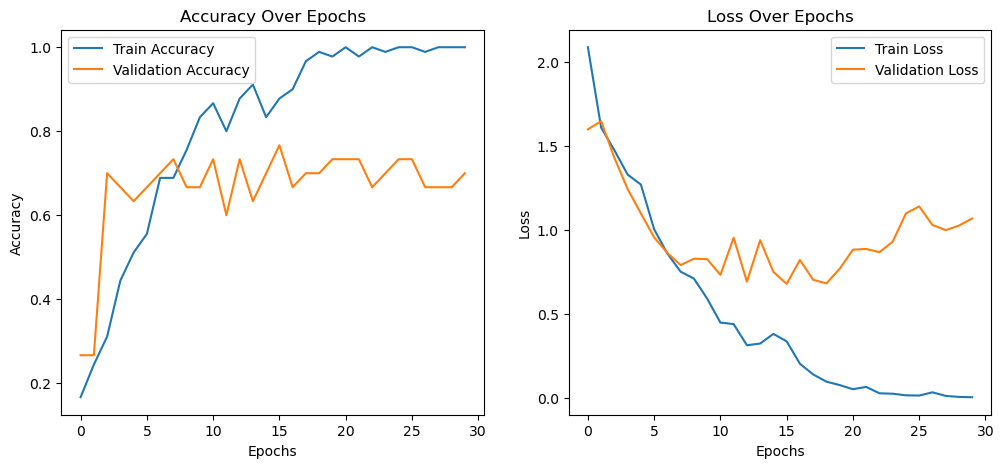

In [6]:
# 학습 과정 그래프 출력
plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
# 모델 저장
model.save("./source/kfood_model.h5")
print("✅ 모델 저장 완료: ./source/kfood_model.h5")

✅ 모델 저장 완료: ./source/kfood_model.h5


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
import glob

# 테스트할 이미지 폴더
test_dir = "./source/test/"

# 사용할 카테고리
categories = ["Chicken", "Dolsotbab", "Jeyugbokk-eum", "Kimchi", 
              "Samgyeobsal", "SoybeanPasteStew"]

image_size = 64  # 이미지 크기
num_classes = len(categories)

# 카테고리별 5개씩 이미지 선택
image_files = []
for category in categories:
    category_path = os.path.join(test_dir, category)
    images = glob.glob(os.path.join(category_path, "*.jpg"))  # 해당 카테고리의 모든 이미지 가져오기

    # 최대 5개 선택
    selected_images = images[:5]
    
    if len(selected_images) < 5:
        print(f"⚠️ {category}에 이미지가 부족합니다. {len(selected_images)}개 선택됨.")

    image_files.extend(selected_images)

# 이미지 파일 출력
print(f"🔍 카테고리별 5개씩 총 {len(image_files)}개 선택됨:")
for file in image_files:
    print(f" - {file}")


🔍 카테고리별 5개씩 총 30개 선택됨:
 - ./source/test/Chicken\chicken_11.jpg
 - ./source/test/Chicken\chicken_12.jpg
 - ./source/test/Chicken\chicken_13.jpg
 - ./source/test/Chicken\chicken_14.jpg
 - ./source/test/Chicken\chicken_15.jpg
 - ./source/test/Dolsotbab\Dolsotbab_11.jpg
 - ./source/test/Dolsotbab\Dolsotbab_12.jpg
 - ./source/test/Dolsotbab\Dolsotbab_13.jpg
 - ./source/test/Dolsotbab\Dolsotbab_14.jpg
 - ./source/test/Dolsotbab\Dolsotbab_15.jpg
 - ./source/test/Jeyugbokk-eum\Jeyugbokk-eum11.jpg
 - ./source/test/Jeyugbokk-eum\Jeyugbokk-eum12.jpg
 - ./source/test/Jeyugbokk-eum\Jeyugbokk-eum13.jpg
 - ./source/test/Jeyugbokk-eum\Jeyugbokk-eum14.jpg
 - ./source/test/Jeyugbokk-eum\Jeyugbokk-eum15.jpg
 - ./source/test/Kimchi\kimchi11.jpg
 - ./source/test/Kimchi\kimchi12.jpg
 - ./source/test/Kimchi\kimchi13.jpg
 - ./source/test/Kimchi\kimchi14.jpg
 - ./source/test/Kimchi\kimchi15.jpg
 - ./source/test/Samgyeobsal\Samgyeobsal11.jpg
 - ./source/test/Samgyeobsal\Samgyeobsal12.jpg
 - ./source/test/Samgye

In [12]:
X = []
files = []

for fname in image_files:
    try:
        img = Image.open(fname)
        img = img.convert("RGB")
        img = img.resize((image_size, image_size))
        in_data = np.asarray(img)
        in_data = in_data.astype("float32") / 255.0  # 0~1 정규화
        X.append(in_data)
        files.append(fname)
    except Exception as e:
        print(f"❌ 오류: {fname} 이미지 로드 실패 - {e}")

# numpy 배열 변환
X = np.array(X)

# 이미지 로드 확인
print(f"✅ {X.shape[0]}개의 이미지 로드 완료!")


✅ 30개의 이미지 로드 완료!


In [13]:
# 모델 파일 로드
model_path = './source/kfood_model.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"❌ 모델 파일을 찾을 수 없습니다: {model_path}")

print(f"✅ 모델 로드 중... {model_path}")
model = load_model(model_path)


✅ 모델 로드 중... ./source/kfood_model.h5


In [14]:
# 모델 예측
predictions = model.predict(X)

# 예측 결과 출력
for i, pred in enumerate(predictions):
    class_idx = np.argmax(pred)  # 가장 높은 확률을 가진 클래스 인덱스
    confidence = pred[class_idx]  # 확률 값

    print(f"📌 입력: {files[i]}")
    print(f"🔮 예측: [{class_idx}] {categories[class_idx]} (Score: {confidence:.4f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
📌 입력: ./source/test/Chicken\chicken_11.jpg
🔮 예측: [0] Chicken (Score: 1.0000)

📌 입력: ./source/test/Chicken\chicken_12.jpg
🔮 예측: [0] Chicken (Score: 1.0000)

📌 입력: ./source/test/Chicken\chicken_13.jpg
🔮 예측: [0] Chicken (Score: 0.9966)

📌 입력: ./source/test/Chicken\chicken_14.jpg
🔮 예측: [0] Chicken (Score: 0.9999)

📌 입력: ./source/test/Chicken\chicken_15.jpg
🔮 예측: [0] Chicken (Score: 1.0000)

📌 입력: ./source/test/Dolsotbab\Dolsotbab_11.jpg
🔮 예측: [1] Dolsotbab (Score: 0.9701)

📌 입력: ./source/test/Dolsotbab\Dolsotbab_12.jpg
🔮 예측: [1] Dolsotbab (Score: 1.0000)

📌 입력: ./source/test/Dolsotbab\Dolsotbab_13.jpg
🔮 예측: [1] Dolsotbab (Score: 1.0000)

📌 입력: ./source/test/Dolsotbab\Dolsotbab_14.jpg
🔮 예측: [5] SoybeanPasteStew (Score: 0.9566)

📌 입력: ./source/test/Dolsotbab\Dolsotbab_15.jpg
🔮 예측: [1] Dolsotbab (Score: 1.0000)

📌 입력: ./source/test/Jeyugbokk-eum\Jeyugbokk-eum11.jpg
🔮 예측: [0] Chicken (Score: 0.9956)

📌 입력: ./source/test/Jeyugbokk-eum\Jeyugbokk-eum12.jpg
🔮

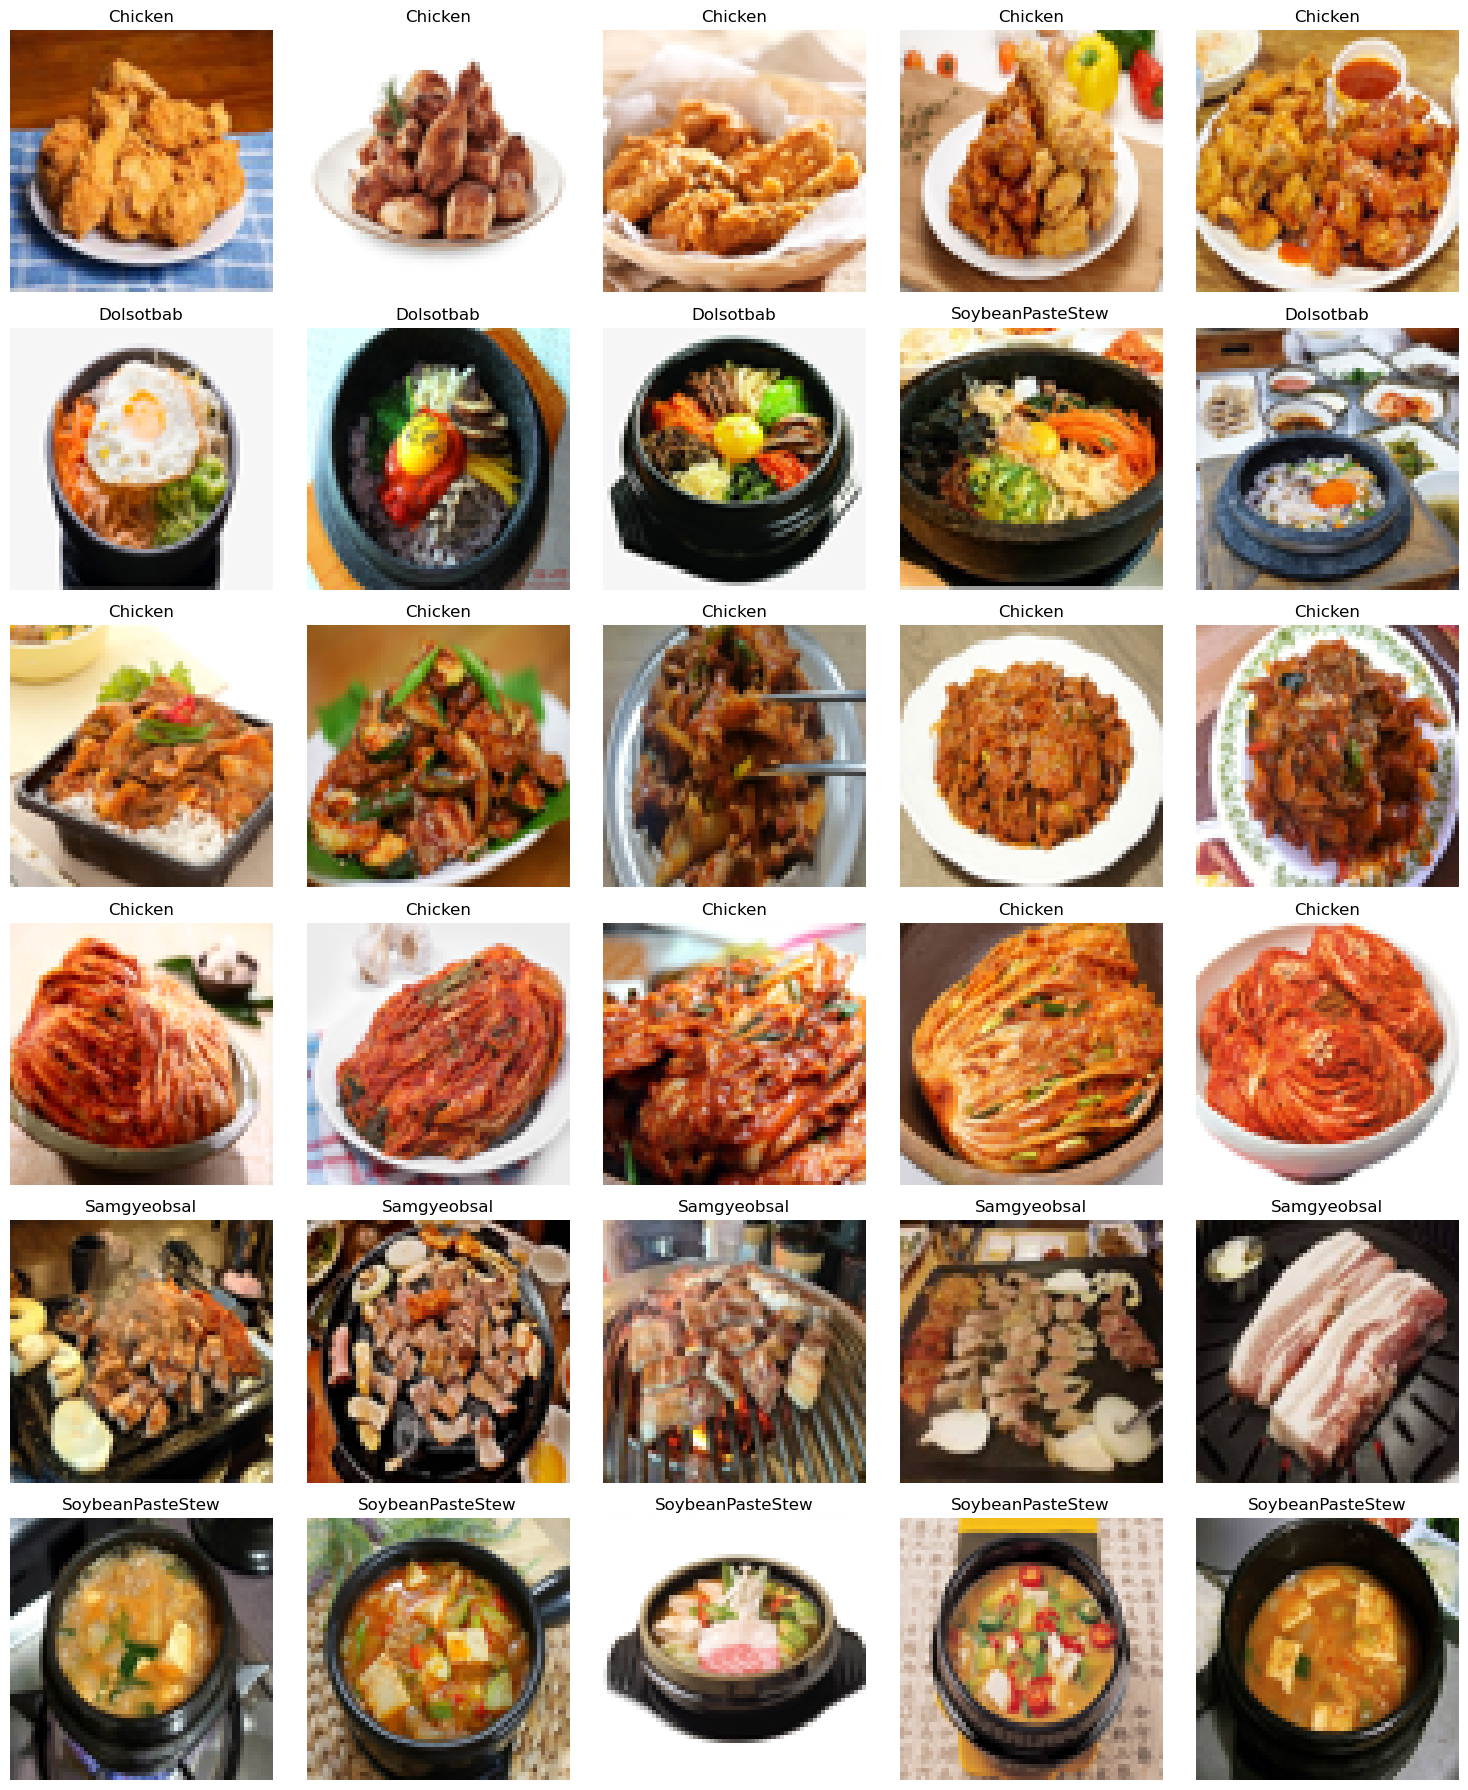

In [15]:
# 한 줄에 최대 5개씩 출력
cols = 5
rows = (len(X) + cols - 1) // cols  # 전체 이미지 개수를 5개씩 나눠 행 개수 계산

plt.figure(figsize=(cols * 3, rows * 3))  # 크기 조정

for i in range(len(X)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.axis("off")
    plt.title(f"{categories[np.argmax(predictions[i])]}")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()